In [1]:
import fakenewsutilities as fns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
import numpy as np

### 1. Read the data, initial data cleaning

In [2]:
df = pd.read_csv('tweets_labeled.csv')
#I didn't remove all punctuation at first step, in case we may include punctuation in generating features.
df_clean = fns.wash_pandas_str(df)
df_clean.head()  

,tweet_id,text,label
0,1161040537207463936,'The Endangered Species Act saved the bald eag...,1
1,1176360756239118342,"'Interesting concept impeach first, find fact...",1
2,1099036648573145088,'#BuildTheWall #DeportThemAll,0
3,1092915693203480577,'Why would the MEXICAN GOVT fund this? Who are...,0
4,1149038450668187654,'Sweden Announces Plan To Get 100% Of Energy F...,0


### 2. Data Analysis

In [6]:
#get the tweets and lables, split the data into 70% training data and 30% test data
X = df_clean.iloc[:,0:2]
Y = df_clean.iloc[:,2]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 45, test_size  = 0.3)

In [7]:
# train the training data by using Naive Bayes    
# I tested with 500, 1000, 1500, 2000, 2500 and 3000 high frequency words, 
# by comparing the accuracy and running time, I decided to use 2000 high frequency words.
train_df, fake_prob_prior= fns.naive_bayes_train(X_train, Y_train)

In [20]:
train_df.head()

,word,cnt_in_true,cnt_in_fake,freq_true,freq_fake,total_cnt
22,trump,8904,12574,0.082991,0.249020,21478
186,us,4488,2998,0.041831,0.059373,7486
28,illegal,5838,418,0.054414,0.008278,6256
607,gun,5770,432,0.053780,0.008555,6202
4,new,3162,2900,0.029472,0.057433,6062


In [48]:
import importlib

In [49]:
importlib.reload(fns)

<module 'fakenewsutilities' from 'C:\\Users\\Mushroom\\Desktop\\FML\\AI project\\fakenewsutilities.py'>

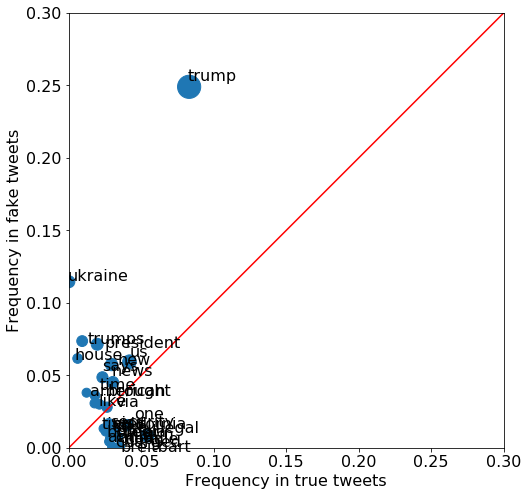

In [52]:
#show only 30words here, because too much words would be all mess
fns.plot_word_map(train_df[0:30],xlimit = 0.3)

From above we can see, people sent fake tweets and true tweets have different wording habits.
We can calculating the frequency of individual words in true and fake tweets.

Then we can use this word frequency as feature.

Future more, we can also use bigram frequency as feature.

After tagging the bigram, we can use bigram-tagging frequency as feature. 


### 3. Generate Features  


#### 3.1 Word frequency feature part :

In [8]:
# get word frequency feature for svm
word_frequency_feature_train = fns.naive_bayes_generate_feature(train_df, fake_prob_prior, X_train, Y_train)

1000 tested, accuracy 0.932000
2000 tested, accuracy 0.929500
3000 tested, accuracy 0.929000
4000 tested, accuracy 0.929500
5000 tested, accuracy 0.930600
6000 tested, accuracy 0.933167
7000 tested, accuracy 0.932143
8000 tested, accuracy 0.932750
9000 tested, accuracy 0.932889
10000 tested, accuracy 0.931500
11000 tested, accuracy 0.931364
12000 tested, accuracy 0.931167
13000 tested, accuracy 0.930615
14000 tested, accuracy 0.931143
15000 tested, accuracy 0.930133
16000 tested, accuracy 0.930562
17000 tested, accuracy 0.930000
18000 tested, accuracy 0.930944
19000 tested, accuracy 0.931632
20000 tested, accuracy 0.931500
21000 tested, accuracy 0.932190
22000 tested, accuracy 0.932273
23000 tested, accuracy 0.932087
24000 tested, accuracy 0.932125
25000 tested, accuracy 0.932440
26000 tested, accuracy 0.931808
27000 tested, accuracy 0.932593
28000 tested, accuracy 0.933143
29000 tested, accuracy 0.933138
30000 tested, accuracy 0.932900
31000 tested, accuracy 0.932710
32000 tested, acc

#### 3.2 Bigram frequency feature part :

In [9]:
#train the training data by using Naive Bayes 
# I tested with 500, 1000, 1500, 2000, 2500 and 3000 high frequency bigrams, 
# by comparing the accuracy and running time, I decided to use 2000 high frequency bigrams.
train_df_bigrm, fake_prob_prior = fns.naive_bayes_bigrm_train(X_train, Y_train)

In [10]:
# generate bigram frequency feature for svm
bigrm_frequency_feature_train = fns.naive_bayes_generate_feature_bigrm(train_df_bigrm, fake_prob_prior, X_train, Y_train)


1000 tested, accuracy 0.894000
2000 tested, accuracy 0.883000
3000 tested, accuracy 0.886667
4000 tested, accuracy 0.887000
5000 tested, accuracy 0.887800
6000 tested, accuracy 0.890000
7000 tested, accuracy 0.891000
8000 tested, accuracy 0.889875
9000 tested, accuracy 0.889333
10000 tested, accuracy 0.888700
11000 tested, accuracy 0.889273
12000 tested, accuracy 0.888667
13000 tested, accuracy 0.888154
14000 tested, accuracy 0.888786
15000 tested, accuracy 0.886867
16000 tested, accuracy 0.887563
17000 tested, accuracy 0.887824
18000 tested, accuracy 0.887833
19000 tested, accuracy 0.888316
20000 tested, accuracy 0.887950
21000 tested, accuracy 0.887952
22000 tested, accuracy 0.888545
23000 tested, accuracy 0.888609
24000 tested, accuracy 0.888583
25000 tested, accuracy 0.888960
26000 tested, accuracy 0.888615
27000 tested, accuracy 0.889037
28000 tested, accuracy 0.889250
29000 tested, accuracy 0.889483
30000 tested, accuracy 0.889500
31000 tested, accuracy 0.889419
32000 tested, acc

#### 3.3 Bigram- tagging frequency feature part: 

In [11]:
# Bigram of Tags using SVM
train_tagged_bigram_features = fns.tags_bigram_generate_features(X_train) 

1000 processed
2000 processed
3000 processed
4000 processed
5000 processed
6000 processed
7000 processed
8000 processed
9000 processed
10000 processed
11000 processed
12000 processed
13000 processed
14000 processed
15000 processed
16000 processed
17000 processed
18000 processed
19000 processed
20000 processed
21000 processed
22000 processed
23000 processed
24000 processed
25000 processed
26000 processed
27000 processed
28000 processed
29000 processed
30000 processed
31000 processed
32000 processed
33000 processed
34000 processed
35000 processed
36000 processed
37000 processed
38000 processed
39000 processed
40000 processed
41000 processed
42000 processed
43000 processed
44000 processed
45000 processed
46000 processed
47000 processed
48000 processed
49000 processed
50000 processed
51000 processed
52000 processed
53000 processed
54000 processed
55000 processed
56000 processed
57000 processed
58000 processed
59000 processed
60000 processed
61000 processed
62000 processed
63000 processed
6

###  4. Build the mode,use svm from sklearn. 

#### 4.1 for word frequency feature:

In [13]:
X1 = fns.conv_array(word_frequency_feature_train)
y = Y_train

In [14]:
clf_word = svm.SVC()
clf_word.fit(X1, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
#get word frequency of testing data set
word_frequency_feature_test = fns.naive_bayes_generate_feature(train_df, fake_prob_prior, X_test, Y_test)
X2 = fns.conv_array(word_frequency_feature_test)

1000 tested, accuracy 0.940000
2000 tested, accuracy 0.937500
3000 tested, accuracy 0.934333
4000 tested, accuracy 0.936000
5000 tested, accuracy 0.934400
6000 tested, accuracy 0.934167
7000 tested, accuracy 0.933857
8000 tested, accuracy 0.934125
9000 tested, accuracy 0.933667
10000 tested, accuracy 0.933400
11000 tested, accuracy 0.933000
12000 tested, accuracy 0.933417
13000 tested, accuracy 0.934000
14000 tested, accuracy 0.934571
15000 tested, accuracy 0.934533
16000 tested, accuracy 0.934937
17000 tested, accuracy 0.934235
18000 tested, accuracy 0.934167
19000 tested, accuracy 0.934053
20000 tested, accuracy 0.934200
21000 tested, accuracy 0.933952
22000 tested, accuracy 0.933864
23000 tested, accuracy 0.933565
24000 tested, accuracy 0.932875
25000 tested, accuracy 0.933000
26000 tested, accuracy 0.932885
27000 tested, accuracy 0.932481
28000 tested, accuracy 0.932571
29000 tested, accuracy 0.932793
30000 tested, accuracy 0.932667
31000 tested, accuracy 0.932419
32000 tested, acc

#### 4.2 for bigram frequency

In [17]:
X3 = fns.conv_array(bigrm_frequency_feature_train)
y = Y_train

In [18]:
clf_bigrm = svm.SVC()
clf_bigrm.fit(X3, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
# get bigram frequency testing data set
bigrm_frequency_feature_test = fns.naive_bayes_generate_feature_bigrm(train_df_bigrm, fake_prob_prior, X_test, Y_test)
X4 = fns.conv_array(bigrm_frequency_feature_test)

1000 tested, accuracy 0.905000
2000 tested, accuracy 0.899500
3000 tested, accuracy 0.899667
4000 tested, accuracy 0.894750
5000 tested, accuracy 0.895800
6000 tested, accuracy 0.895667
7000 tested, accuracy 0.895571
8000 tested, accuracy 0.894375
9000 tested, accuracy 0.894000
10000 tested, accuracy 0.894100
11000 tested, accuracy 0.893818
12000 tested, accuracy 0.895500
13000 tested, accuracy 0.895692
14000 tested, accuracy 0.895357
15000 tested, accuracy 0.894867
16000 tested, accuracy 0.895687
17000 tested, accuracy 0.894882
18000 tested, accuracy 0.894389
19000 tested, accuracy 0.894632
20000 tested, accuracy 0.894350
21000 tested, accuracy 0.893714
22000 tested, accuracy 0.893136
23000 tested, accuracy 0.892261
24000 tested, accuracy 0.891958
25000 tested, accuracy 0.892120
26000 tested, accuracy 0.891731
27000 tested, accuracy 0.891259
28000 tested, accuracy 0.891143
29000 tested, accuracy 0.890931
30000 tested, accuracy 0.890500
31000 tested, accuracy 0.890935
32000 tested, acc

#### 4.3 for bigram tagging frequency feature

In [34]:
clf_tags = svm.SVC(gamma='scale')
clf_tags.fit(train_tagged_bigram_features, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
test_tagged_bigram_features = fns.tags_bigram_generate_features(X_test)

1000 processed
2000 processed
3000 processed
4000 processed
5000 processed
6000 processed
7000 processed
8000 processed
9000 processed
10000 processed
11000 processed
12000 processed
13000 processed
14000 processed
15000 processed
16000 processed
17000 processed
18000 processed
19000 processed
20000 processed
21000 processed
22000 processed
23000 processed
24000 processed
25000 processed
26000 processed
27000 processed
28000 processed
29000 processed
30000 processed
31000 processed
32000 processed
33000 processed
34000 processed
35000 processed
36000 processed
37000 processed
38000 processed
39000 processed
40000 processed
41000 processed
42000 processed
43000 processed
44000 processed
45000 processed
46000 processed
47000 processed
48000 processed
49000 processed
50000 processed
51000 processed
52000 processed
53000 processed
54000 processed
55000 processed
56000 processed
57000 processed
58000 processed
59000 processed
60000 processed
61000 processed
62000 processed
63000 processed
6

### 5.Evaluation the model

#### 5.1 for work frequency feature:

In [36]:
Y_test_nparray = np.array(Y_test)
Y_predict = clf_word.predict(X2)

clf_word.score(X2, Y_test)

0.9399899441010322

In [37]:
# get the confusion matrix to see how our model worked on test set.  
cm_word = confusion_matrix(Y_test, Y_predict)
cm_word 

array([[44479,  1694],
       [ 2364, 19085]], dtype=int64)

In [38]:
# details of accuracy and recall :
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     46173
           1       0.92      0.89      0.90     21449

    accuracy                           0.94     67622
   macro avg       0.93      0.93      0.93     67622
weighted avg       0.94      0.94      0.94     67622



The precision for fake tweets is 92% , for true tweets is better, 95%

The recall of fake tweets is 89%, about 11% tweets were wrong predictioned.

#### 5.2 for bigram frequency feature

In [39]:
Y_test_nparray = np.array(Y_test)
Y_predict_2 = clf_bigrm.predict(X4)

clf_bigrm.score(X4, Y_test)

0.8942799680577327

In [40]:
# get the confusion matrix to see how our model worked on test set.  
cm_bigrm = confusion_matrix(Y_test, Y_predict_2)
cm_bigrm

array([[44204,  1969],
       [ 5180, 16269]], dtype=int64)

In [41]:
# details of accuracy and recall :
print(classification_report(Y_test, Y_predict_2))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     46173
           1       0.89      0.76      0.82     21449

    accuracy                           0.89     67622
   macro avg       0.89      0.86      0.87     67622
weighted avg       0.89      0.89      0.89     67622



The precision for fake tweets is 89% , for true tweets is better, 90%

The recall of fake tweets is 76%, about 24% tweets were wrong predictioned.

#### 5.2 for tagged bigram feature

In [42]:
clf_tags.score(test_tagged_bigram_features, Y_test)


0.9339859808937919

In [43]:
Y_predict_3 = clf_tags.predict(test_tagged_bigram_features)

In [44]:
# get the confusion matrix to see how our model worked on test set.  
cm_tags = confusion_matrix(Y_test, Y_predict_3)
cm_tags

array([[44879,  1294],
       [ 3170, 18279]], dtype=int64)

In [46]:
# details of accuracy and recall :
print(classification_report(Y_test, Y_predict_3))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     46173
           1       0.93      0.85      0.89     21449

    accuracy                           0.93     67622
   macro avg       0.93      0.91      0.92     67622
weighted avg       0.93      0.93      0.93     67622



The precision for fake tweets is 93% , for true tweets are the same.

The recall of fake tweets is also quite good 85%  